In [2]:
import csv
import numpy as np
import pandas as pd
import json
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt

In [6]:
playerstats = pd.read_csv('../../season2/data-2-75.csv')
gameodds = pd.read_csv('../../season2/gameOdds.csv')

In [8]:
def star_rating(row):
    if row['team_role'] == 'lineup' or row['team_role'] == 'bench':
        return (1 - row.tragicness)**0.01 * row.thwackability**0.35 * row.moxie**0.075 * row.divinity**0.35 * row.musclitude**0.075 * (1 - row.patheticism)**0.05 * row.martyrdom**0.02
    elif row['team_role'] == 'rotation'or row['team_role'] == 'bullpen':
        return row.shakespearianism**0.1 * row.unthwackability**0.5 * row.coldness**0.025 * row.overpowerment**0.15 * row.ruthlessness**0.4


In [9]:
playerstats['rating'] = playerstats.apply(star_rating, axis=1)

In [10]:
odds = pd.concat([gameodds['Away Odds'], gameodds['Home Odds']])
wins = pd.concat([gameodds['Away Score'] > gameodds['Home Score'], gameodds['Home Score'] > gameodds['Away Score']])

In [11]:
score = roc_auc_score(wins, odds)

In [15]:
fpr, tpr, pc = roc_curve(wins, odds)

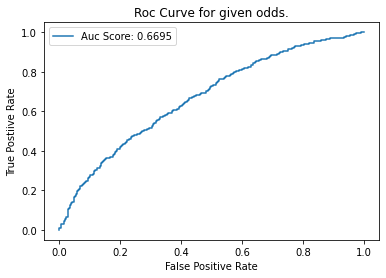

In [16]:
plt.plot(fpr, tpr, label=f'Auc Score: {score:0.4}')
plt.title('Roc Curve for given odds.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postiive Rate')
plt.legend()
plt.savefig('RocAucS2', facecolor='white')

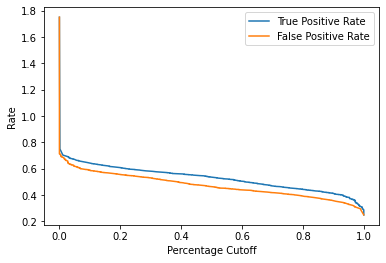

In [21]:
plt.plot(tpr, pc, label='True Positive Rate')
plt.plot(fpr, pc, label='False Positive Rate')
plt.xlabel('Percentage Cutoff')
plt.ylabel('Rate')
plt.legend()
plt.savefig('Percents.png', facecolor='white')

In [22]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [32]:
tpr[find_nearest(pc, .55)]

0.45161290322580644